<a href="https://www.kaggle.com/code/lalit7881/patient-churn-prediction-75-accuracy?scriptVersionId=294572228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Style
sns.set(style="whitegrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient-churn-datasets/patient_churn_dataset.csv


## Patient Churn Prediction – 75% Accuracy

## Description:
This study focuses on predicting patient churn using behavioral, demographic, and healthcare utilization data. The dataset includes features such as age, gender, tenure with the provider, number of visits in the last year, presence of chronic disease, insurance type, satisfaction score, total bill amount, and missed appointments.

Multiple machine learning algorithms were applied, including Random Forest, Decision Tree, Logistic Regression, Support Vector Machine, K-Nearest Neighbors, Naive Bayes, Gradient Boosting, and AdaBoost. Among these, the best-performing model achieved an accuracy of 75%, reflecting the model's ability to correctly identify patients at risk of discontinuing their engagement with healthcare services.

The results indicate that certain factors, such as low satisfaction scores, frequent missed appointments, and high billing amounts, strongly correlate with patient churn. Although the predictive performance is promising, further improvement could be achieved by incorporating additional behavioral or clinical data, tuning model hyperparameters, or addressing class imbalance in the dataset.

This analysis provides healthcare providers with a data-driven approach to identify high-risk patients, allowing for proactive interventions to improve retention, patient satisfaction, and overall care quality.

In [2]:
df = pd.read_csv("/kaggle/input/patient-churn-datasets/patient_churn_dataset.csv")

In [3]:
df.head()

,Patient_ID,Age,Gender,Tenure_Months,Visits_Last_Year,Chronic_Disease,Insurance_Type,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
0,1,56,Female,2,3,No,Government,2.5,12252.96,9,1
1,2,69,Male,10,3,Yes,Government,2.6,25862.01,4,0
2,3,46,Female,56,10,No,NaN,2.8,5659.13,4,0
3,4,32,Male,30,4,Yes,Government,4.1,19533.31,5,0
4,5,60,Male,50,19,No,Private,4.6,24639.52,5,0


In [4]:
df.tail()

,Patient_ID,Age,Gender,Tenure_Months,Visits_Last_Year,Chronic_Disease,Insurance_Type,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
495,496,63,Male,2,4,No,Government,2.8,22659.83,7,0
496,497,41,Female,27,3,No,Government,3.4,7146.61,3,0
497,498,67,Male,31,19,Yes,Government,3.5,47917.74,1,0
498,499,49,Male,51,3,No,Government,3.4,26718.16,4,0
499,500,64,Male,51,17,No,NaN,3.8,12473.72,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   Tenure_Months        500 non-null    int64  
 4   Visits_Last_Year     500 non-null    int64  
 5   Chronic_Disease      500 non-null    object 
 6   Insurance_Type       350 non-null    object 
 7   Satisfaction_Score   500 non-null    float64
 8   Total_Bill_Amount    500 non-null    float64
 9   Missed_Appointments  500 non-null    int64  
 10  Churn                500 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 43.1+ KB


In [6]:
df.describe()

,Patient_ID,Age,Tenure_Months,Visits_Last_Year,Satisfaction_Score,Total_Bill_Amount,Missed_Appointments,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,49.910000,29.498000,9.412000,3.049000,24440.01518,4.422000,0.248000
std,144.481833,18.221909,17.402865,5.687086,1.148136,14264.55432,2.908752,0.432284
min,1.000000,18.000000,1.000000,0.000000,1.000000,506.67000,0.000000,0.000000
25%,125.750000,35.000000,14.000000,4.000000,2.000000,13576.08750,2.000000,0.000000
50%,250.500000,50.000000,30.000000,9.000000,3.100000,23996.56000,4.000000,0.000000
75%,375.250000,66.000000,45.000000,14.000000,4.100000,36289.66000,7.000000,0.000000
max,500.000000,79.000000,59.000000,19.000000,5.000000,49892.13000,9.000000,1.000000


In [7]:
df.shape

(500, 11)

In [8]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tenure_Months            int64
Visits_Last_Year         int64
Chronic_Disease         object
Insurance_Type          object
Satisfaction_Score     float64
Total_Bill_Amount      float64
Missed_Appointments      int64
Churn                    int64
dtype: object

In [9]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Tenure_Months            0
Visits_Last_Year         0
Chronic_Disease          0
Insurance_Type         150
Satisfaction_Score       0
Total_Bill_Amount        0
Missed_Appointments      0
Churn                    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tenure_Months', 'Visits_Last_Year',
       'Chronic_Disease', 'Insurance_Type', 'Satisfaction_Score',
       'Total_Bill_Amount', 'Missed_Appointments', 'Churn'],
      dtype='object')

## Data visualizations

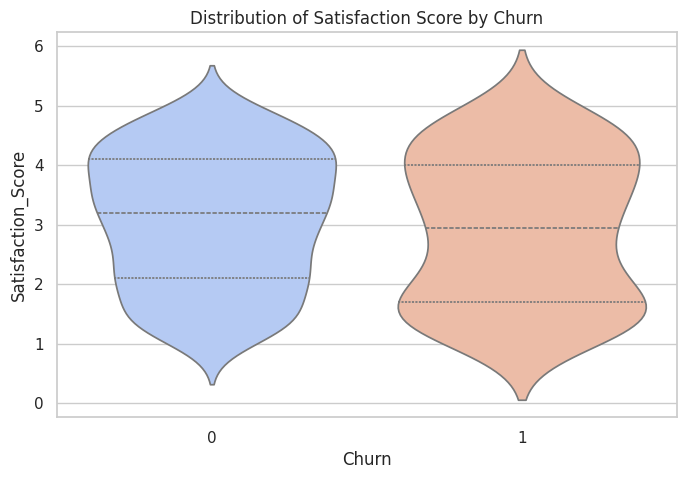

In [12]:
sns.set(style="whitegrid", palette="muted")

# 1. Violin Plot: Satisfaction Score distribution by Churn
plt.figure(figsize=(8,5))
sns.violinplot(x='Churn', y='Satisfaction_Score', data=df, palette='coolwarm', inner='quartile')
plt.title('Distribution of Satisfaction Score by Churn')
plt.show()

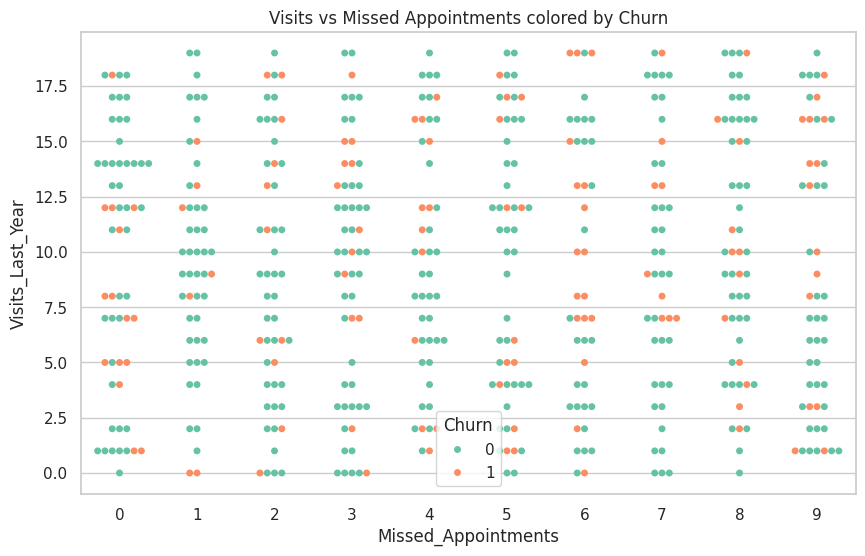

In [13]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Missed_Appointments', y='Visits_Last_Year', hue='Churn', data=df, palette='Set2')
plt.title('Visits vs Missed Appointments colored by Churn')
plt.show()

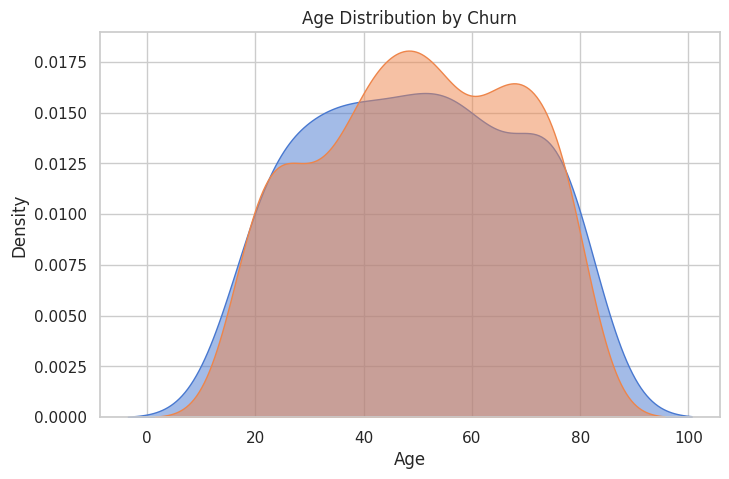

In [14]:
plt.figure(figsize=(8,5))
for c in df['Churn'].unique():
    sns.kdeplot(df[df['Churn']==c]['Age'], label=f'Churn={c}', fill=True, alpha=0.5)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.show()

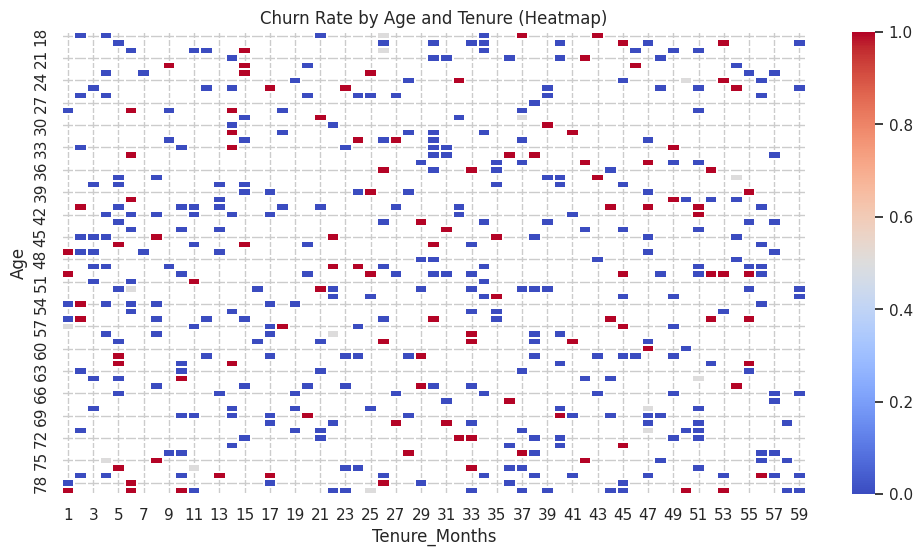

In [15]:
churn_matrix = df.pivot_table(index='Age', columns='Tenure_Months', values='Churn', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(churn_matrix, cmap='coolwarm', linecolor='white', linewidths=0.2)
plt.title('Churn Rate by Age and Tenure (Heatmap)')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
features = ['Age', 'Tenure_Months', 'Visits_Last_Year', 'Satisfaction_Score', 'Total_Bill_Amount', 'Missed_Appointments']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

fig = px.parallel_coordinates(df_scaled, color='Churn',
                              dimensions=features,
                              color_continuous_scale=px.colors.diverging.RdBu,
                              color_continuous_midpoint=0.5)
fig.update_layout(title='Parallel Coordinates: Patient Features vs Churn')
fig.show()


In [17]:
fig = px.sunburst(df, path=['Gender', 'Chronic_Disease', 'Churn'], values='Visits_Last_Year',
                  color='Churn', color_continuous_scale='RdBu', title='Sunburst: Gender, Chronic Disease, and Churn')
fig.show()

# 7. Bubble Chart: Age vs Total Bill, bubble size = Visits, color = Churn
fig = px.scatter(df, x='Age', y='Total_Bill_Amount', size='Visits_Last_Year', color='Churn',
                 hover_data=['Patient_ID', 'Satisfaction_Score'], title='Age vs Total Bill with Visits and Churn')
fig.show()

In [18]:
fig = px.sunburst(df, path=['Gender', 'Chronic_Disease', 'Churn'], values='Visits_Last_Year',
                  color='Churn', color_continuous_scale='RdBu', title='Sunburst: Gender, Chronic Disease, and Churn')
fig.show()

In [19]:
fig = px.scatter(df, x='Age', y='Total_Bill_Amount', size='Visits_Last_Year', color='Churn',
                 hover_data=['Patient_ID', 'Satisfaction_Score'], title='Age vs Total Bill with Visits and Churn')
fig.show()

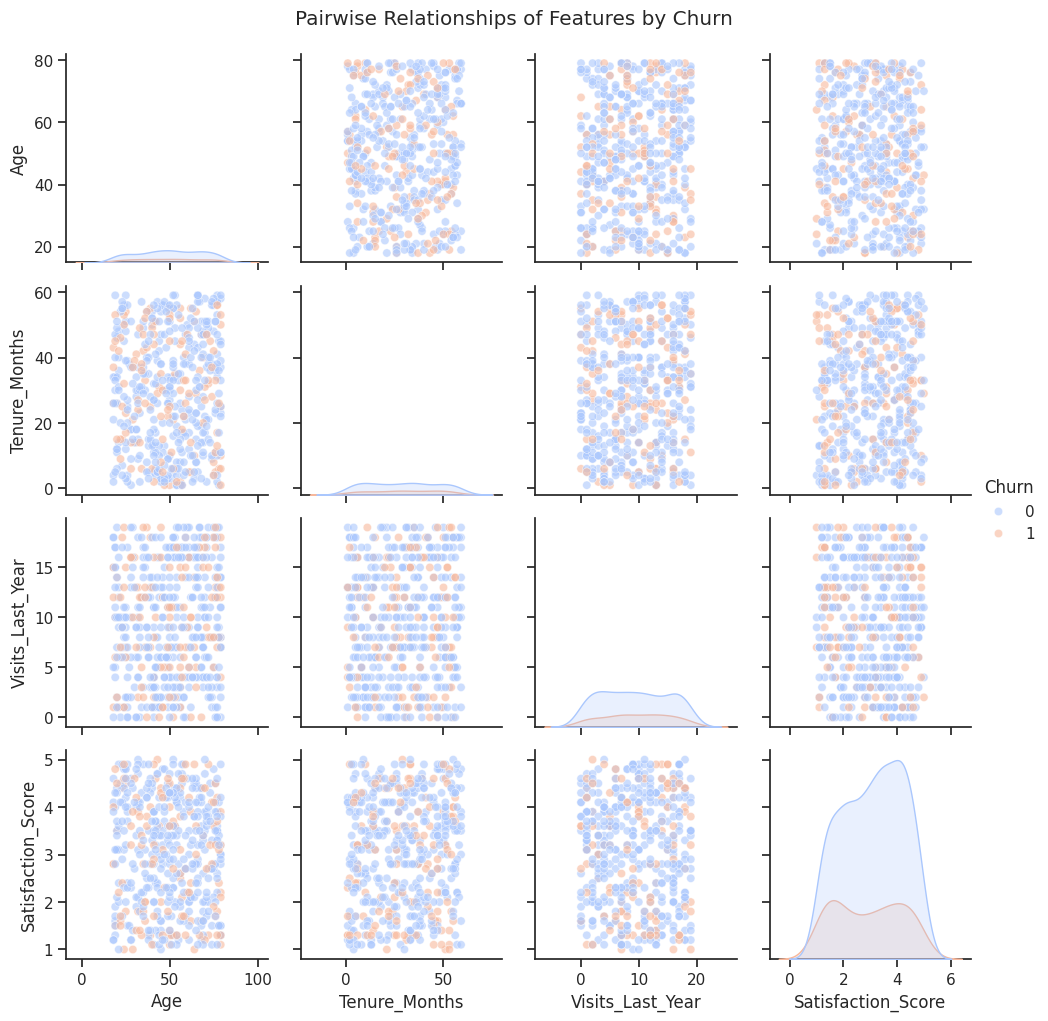

In [20]:
sns.set(style="ticks")
g = sns.PairGrid(df, vars=['Age', 'Tenure_Months', 'Visits_Last_Year', 'Satisfaction_Score'], hue='Churn', palette='coolwarm')
g.map_diag(sns.kdeplot, fill=True)
g.map_offdiag(sns.scatterplot, alpha=0.6)
g.add_legend()
plt.suptitle('Pairwise Relationships of Features by Churn', y=1.02)
plt.show()

In [21]:
categorical_cols = ["Gender", "Chronic_Disease", "Insurance_Type"]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
X = df.drop(columns=["Patient_ID", "Churn"])
y = df["Churn"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42)
}

In [26]:
results_list = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    results_list.append({"Model": name, "Accuracy (%)": round(acc, 2)})
    
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100

--------------------------------------------------
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       0.00      0.00      0.00        25

    accuracy                           0.75       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.56      0.75      0.64       100

--------------------------------------------------
Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        75
           1       0.15      0.08      0.11        

In [27]:
results = pd.DataFrame(results_list).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
print("\nSummary of Model Accuracies:")
print(results)


Summary of Model Accuracies:
                    Model  Accuracy (%)
0     Logistic Regression          75.0
1  Support Vector Machine          75.0
2             Naive Bayes          75.0
3           Random Forest          75.0
4                AdaBoost          75.0
5       Gradient Boosting          71.0
6           Decision Tree          67.0
7     K-Nearest Neighbors          66.0


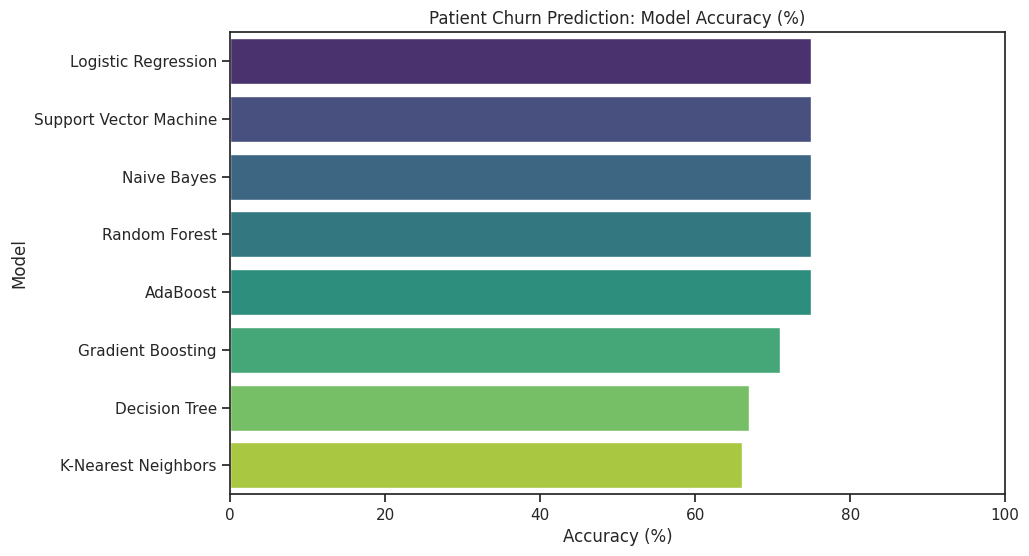

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy (%)", y="Model", data=results, palette="viridis")
plt.title("Patient Churn Prediction: Model Accuracy (%)")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.show()

## Thank you..pls upvote!!!!